# Prediction of breast cancer using Artificial Neural Networks

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
x = data.data
y = data.target

In [3]:
df = pd.DataFrame(data = x, columns=data.feature_names)
df['target'] = pd.Series(data = y)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential([
    Dense(16, input_dim = x.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(len(np.unique(y))-1, activation='sigmoid')
])

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = classifier.fit(x, y, epochs=35, batch_size=32 ,validation_split=0.2)

Epoch 1/35
15/15 [==============================] - 1s 22ms/step - loss: 32.1455 - accuracy: 0.3648 - val_loss: 12.5576 - val_accuracy: 0.1228
Epoch 2/35
15/15 [==============================] - 0s 5ms/step - loss: 15.1860 - accuracy: 0.1802 - val_loss: 11.4151 - val_accuracy: 0.1404
Epoch 3/35
15/15 [==============================] - 0s 5ms/step - loss: 10.2924 - accuracy: 0.2527 - val_loss: 5.8036 - val_accuracy: 0.2281
Epoch 4/35
15/15 [==============================] - 0s 5ms/step - loss: 6.9570 - accuracy: 0.2308 - val_loss: 3.7246 - val_accuracy: 0.2982
Epoch 5/35
15/15 [==============================] - 0s 4ms/step - loss: 3.7396 - accuracy: 0.3780 - val_loss: 2.0138 - val_accuracy: 0.5088
Epoch 6/35
15/15 [==============================] - 0s 5ms/step - loss: 1.2644 - accuracy: 0.6198 - val_loss: 1.1398 - val_accuracy: 0.7018
Epoch 7/35
15/15 [==============================] - 0s 5ms/step - loss: 0.6984 - accuracy: 0.7780 - val_loss: 0.5780 - val_accuracy: 0.8158
Epoch 8/35
15/

In [6]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

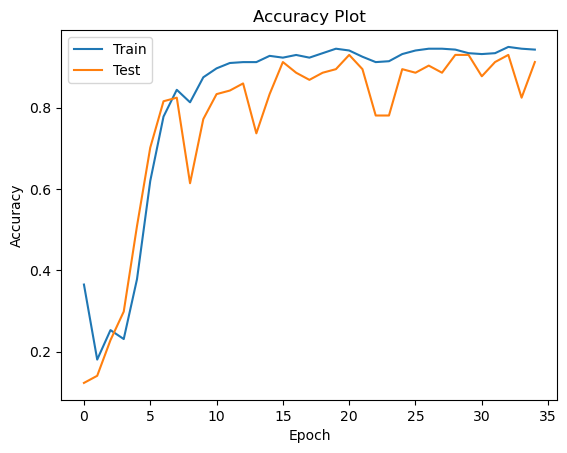

In [7]:
import matplotlib.pyplot as plt

plt.plot(acc)
plt.plot(val_acc)
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


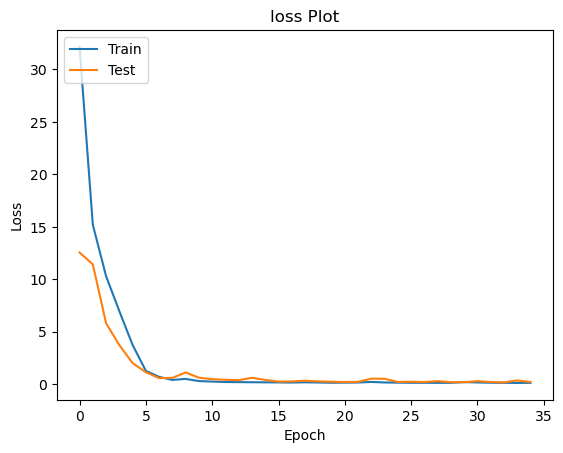

In [8]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()